###### Imports

In [2]:
drive.mount('/content/drive')
project_path = '/content/drive/MyDrive/lewagon-deepdive/'

Mounted at /content/drive


In [1]:
import librosa
import numpy as np
import librosa.display
from google.colab import drive
import matplotlib.pyplot as plt
from matplotlib import image
from IPython.display import Audio

In [ ]:
%load_ext autoreload
%autoreload 2 

In [ ]:
import sys; sys.path
sys.path.append('/content/drive/MyDrive/lewagon-deepdive/lewagon-deepdive') 

# load file and play audio

In [9]:
# Load the audio as a waveform `y`
# Store the sampling rate as `sr`
y, sr = librosa.load(project_path + 'raw_data/watkins_audio_files/AC2A_6304300N.wav',sr=44_100)

In [10]:
# play the sound
Audio(y, rate=sr)

# plot waveform

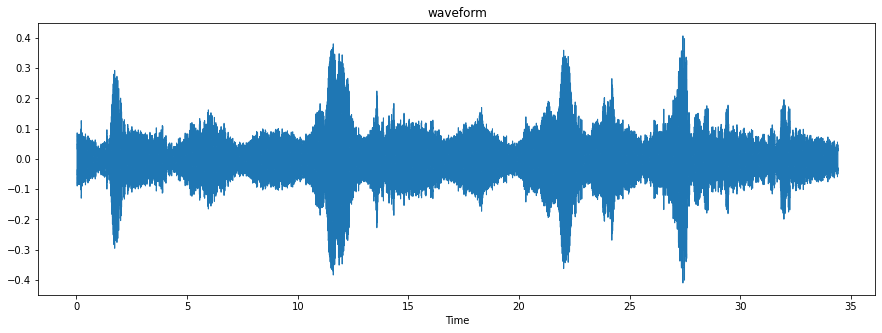

In [11]:
plt.figure(figsize=(15,5))

librosa.display.waveshow(y)
plt.title('waveform');

In [13]:
len(y)

758532

# plot spectrogram

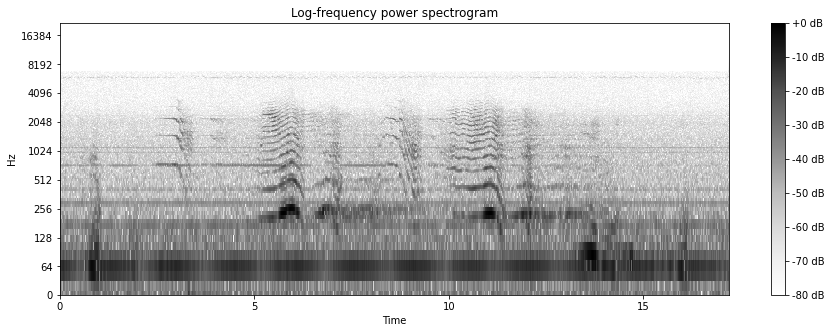

In [14]:
plt.figure(figsize=(15,5))

D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, y_axis='log', x_axis='time', cmap = 'Greys', sr=sr)
plt.colorbar(format='%+2.0f dB');
plt.title('Log-frequency power spectrogram');

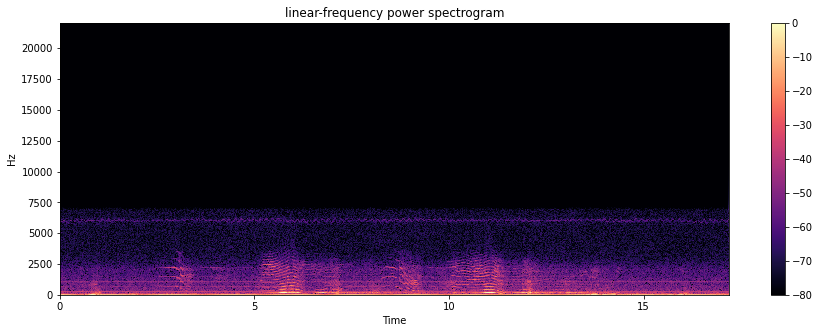

In [32]:
plt.figure(figsize=(15,5))

D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, y_axis='linear', x_axis='time', sr=sr)
plt.colorbar();
plt.title('linear-frequency power spectrogram');

# Mel scale 

https://towardsdatascience.com/getting-to-know-the-mel-spectrogram-31bca3e2d9d0

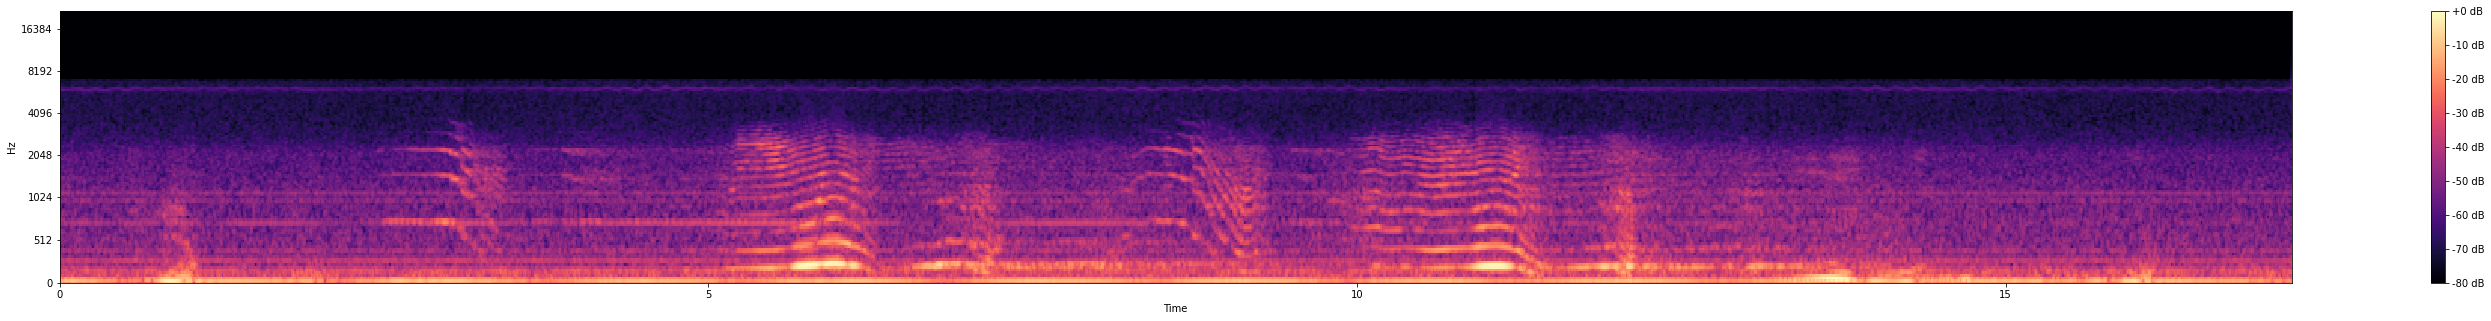

In [36]:
plt.figure(figsize=(50,5))

S = librosa.feature.melspectrogram(y=y, sr=sr)
S_DB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_DB, sr=sr,x_axis='time', y_axis='mel');
plt.colorbar(format='%+2.0f dB');

In [17]:
S_DB.shape

(128, 1482)

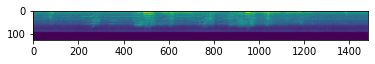

In [18]:
plt.imshow(S_DB)

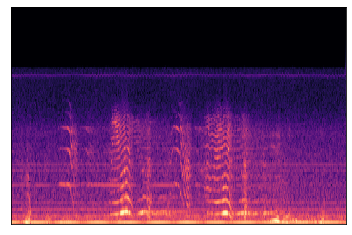

In [30]:
M = librosa.feature.melspectrogram(y=y, sr=sr)
M_db = librosa.power_to_db(M, ref=np.max)
img = librosa.display.specshow(M_db)

In [29]:
type(img)

matplotlib.collections.QuadMesh

In [ ]:
S = librosa.feature.melspectrogram(y=y2, sr=sr2)
S_DB = librosa.power_to_db(S, ref=np.max)

In [ ]:
plt.imshow(S_DB[:,:119])

# Convert to image and numpy.array

## Save image as png

In [ ]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.rcParams["figure.autolayout"] = True

S = librosa.feature.melspectrogram(y=y)
S_DB = librosa.power_to_db(S, ref=np.max)
plt.axis('off')
test=librosa.display.specshow(S_DB,cmap='gray_r')
# plt.savefig(project_path + 'raw_data/spectrogram_images/AC2A_6301900W.png',bbox_inches='tight',pad_inches = 0)

In [ ]:
type(test)

## Load image as numpy array of shape (x,y,1)

In [ ]:
img = image.imread(project_path + 'raw_data/spectrogram_images/AC2A_6301900W.png' )
# summarize shape of the pixel array
print(img.dtype)
print(img.shape)

In [ ]:
img=img[:,:,0]
img=np.expand_dims(img, axis=-1)
img.shape